In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics as stats
import math

In [2]:
colors = mpl.colormaps["Set1"].colors

In [3]:
df = pd.read_csv("../data/bench.csv")
# sanitize data
df["script"] = df["script"].str.removeprefix("./scripts/")
df["script"] = df["script"].str.removesuffix(".py")
df.head()

,protein,script,cmd,run_seconds,status
0,P55771,neff,docker run -i --rm --gpus all neff-gpu neff_gp...,4.839768,PASS
1,P55771,gapcount,docker run -i --rm --gpus all neff-gpu neff_gp...,2.302713,PASS
2,P55771,mmseqs2,docker run -i --rm neff-mmseqs neff_mmseqs.py,1.821684,PASS
3,P55771,hhsuite,docker run -i --rm neff-hhsuite neff_hhsuite.py,1.206357,PASS
4,A0A1B0GWH4,neff,docker run -i --rm --gpus all neff-gpu neff_gp...,5.816166,PASS


In [4]:
# inspect how many passed
f'{(df["status"] == "PASS").sum()}/{len(df)} runs passed'

'197/200 runs passed'

In [5]:
# only take passed
df = df[df["status"] == "PASS"]

In [6]:
scripts = df["script"].drop_duplicates().tolist()
scripts

['neff', 'gapcount', 'mmseqs2', 'hhsuite']

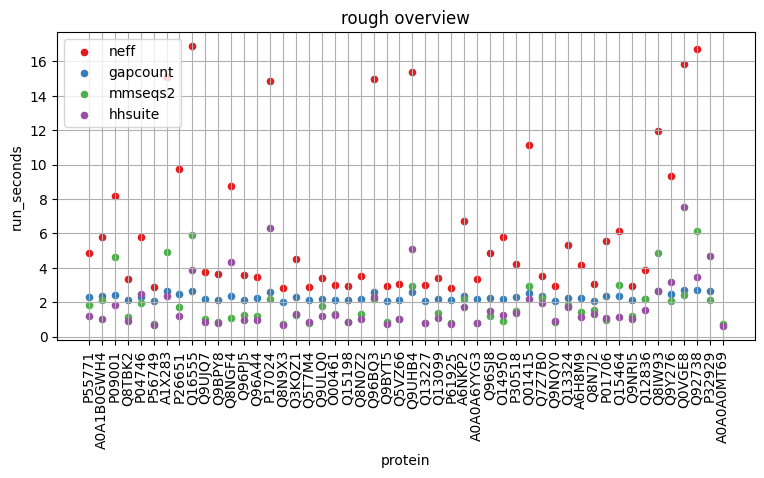

In [7]:
fig, ax = plt.subplots(figsize=(9,4))
ax.set_title("rough overview")
for color, script in enumerate(scripts):
    df[df["script"] == script].plot.scatter(
        x="protein", y="run_seconds", c=(colors[color],),
        ax=ax, grid=True, rot=90, label=script
    )

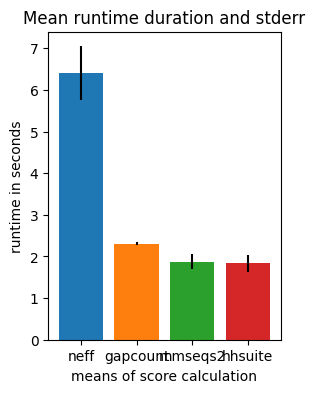

In [9]:
fig, ax = plt.subplots(figsize=(3, 4))
for script in scripts:
    vals = df[df["script"] == script]["run_seconds"].tolist()
    stderr = stats.stdev(vals) / math.sqrt(len(vals))
    ax.bar(script, stats.mean(vals), yerr=stderr)
ax.set_title("Mean runtime duration and stderr")
ax.set_xlabel("means of score calculation")
ax.set_ylabel("runtime in seconds");